### **Adult Census Income Prediction Model**

**Objective:**
The objective of this project is to develop a predictive model using classification analysis to estimate individuals' annual earnings. The dataset, originally compiled by Barry Becker from the 1994 census database, was intended to identify individuals with an annual income exceeding $50,000. Despite its age, this dataset remains a prominent resource in the field of machine learning research.

**Additional Information:**
The dataset comprises of 14 features, including missing values, and is publicly available in the UCI Machine Learning Repository, cited as Becker, Barry and Kohavi, Ronny. (1996). Adult. [UCI Machine Learning Repository](https://doi.org/10.24432/C5XW20).

#### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import copy
from matplotlib import pyplot as plt

***

#### **Fetch Data**

In [3]:
file_path = r"C:\Users\andre\Desktop\deep_learning_projects\datahub\general\adult.csv\adult.csv"
col_names = [
    'age', 'workclass','final_weight', 'education', 
    'education_num','marital_status','occupation',
    'relationship','race', 'sex','capital_gain',
    'capital_loss', 'hours_per_week','native_country',
    'income'
]
data = pd.read_csv(file_path, header=None, names=col_names, sep=',\s', engine='python')
data.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### **Data Summary**

In [4]:
#Categorical data points
data.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [5]:
#Numerical data points
data.describe(exclude='object')

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### **Cleaning & Transformation**

>#### Missing values

In [6]:
# - Below is dataframe showing all features
# - Zero `0` represents non-missing values
# - Only `workclass`, `occupation` and `native_country` contain missing values
# - To mitigate loss of excessive valuable data points, `?` will be considered as unknown/other
temp_df = data.copy()
temp_df.replace('?',np.nan, inplace=True)
print(temp_df.isna().sum())
del temp_df

age                  0
workclass         1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


>#### Duplicates

In [7]:
print('Number of duplicated data points: {}'.format(data.duplicated().sum()))

# - There are `24` duplicated data points
# - Duplicated rows are removed

Number of duplicated data points: 24


In [8]:
#Organize column names
model_points =copy.deepcopy(data)
model_points.drop(['education_num'], axis=1, inplace=True)
# model_points.rename(columns={''}, inplace=True)
#Reformating data points

model_points.workclass = model_points.workclass.map(lambda item: 'other' if item=='?' else item.lower())
model_points.occupation = model_points.occupation.map(lambda item: 'other' if item=='?' else item.lower())
model_points.native_country = model_points.native_country.map(lambda item: 'other' if item=='?' else item.lower())

#coverting categorical data-points to lowercase
for col in model_points.select_dtypes(include='object').columns:
    model_points[col]=model_points[col].map(lambda item: str(item))

#coverting numerical data-points dtype to floating-point
for col in model_points.select_dtypes(exclude='object').columns:
    model_points[col]=model_points[col].map(lambda item: float(item))

- Categorical: `workclass`, `education`, `marital_status`, `occupation`,
        `relationship`, `race`, `sex`, `native_country` and  `income`
- Numerical: `age`, `final_weight`, `education_num`, `capital_gain` and `capital_loss`,
        `hours_per_week`

***
#### **EDA - Exploratory Data Analysis**

In [9]:
# data.drop(columns=['native_country', 'capital_gain','capital_loss', 'education_num', 'final_weight'], inplace=True)

def numerical_insights(plot_type):
  
  
  n_col, n_row = 2, 2 #define number of plots i.e. 2*2=4
  fig, ax= plt.subplots(n_row,n_col, figsize=(14, 7))
  plt.style.use('ggplot')
  
  indx=0 #track plots lables
  numeric_points = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
  colors = ['viridis','magma', 'hls','tab10']

  for i in range(n_row):
      for j in range(n_col):
          
        if plot_type=='box':
          sns.boxplot(model_points,x=f'{numeric_points[indx]}', palette=f'{colors[indx]}',gap=0.6, hue='income', ax=ax[i,j],
                  legend='brief', widths=0.14, meanline=True,
                  meanprops=dict(linewidth=1.4, color='g'))
        elif plot_type=='bar':
          sns.barplot(model_points, y=f'{numeric_points[indx]}', palette=f'{colors[indx]}',gap=0.6, hue='income', ax=ax[i,j])     
          ax[i,j].legend(title='income', bbox_to_anchor=(1.3,1), fontsize='8')
        # ax[i,j].set_ylabel(f'{numeric_points[indx]}')
        indx+=1
      
  plt.tight_layout(pad=3)
  plt.show()

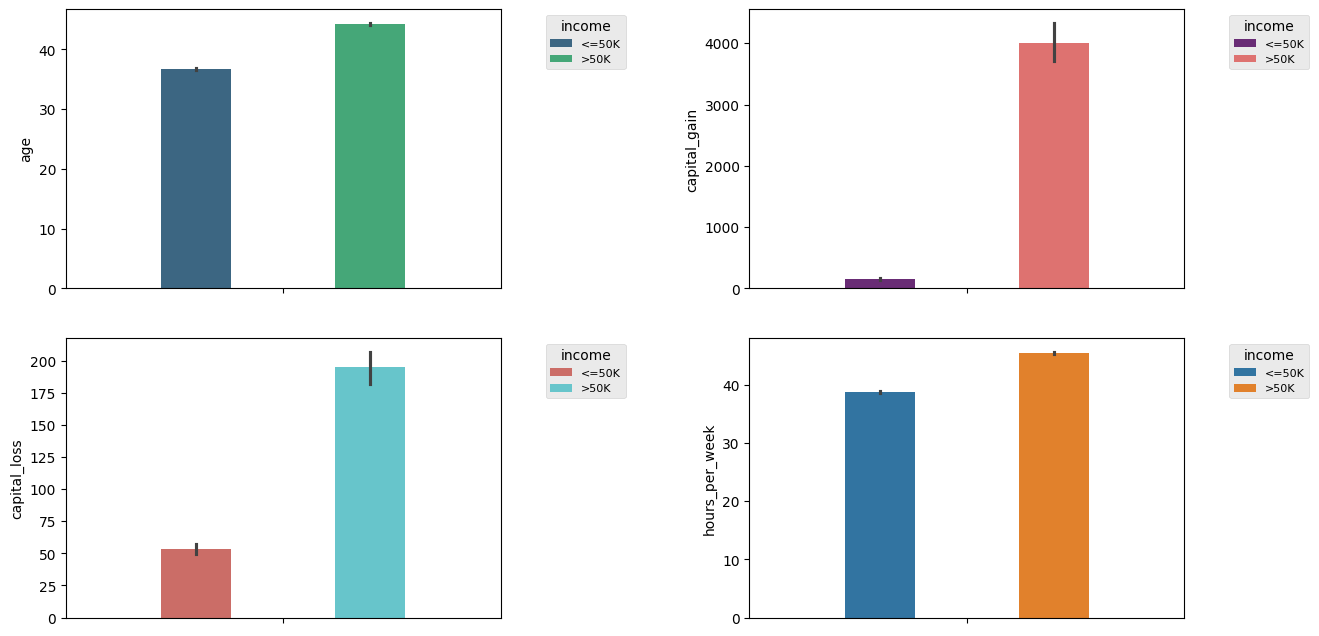

In [10]:
#Numerical bar plots
numerical_insights('bar')

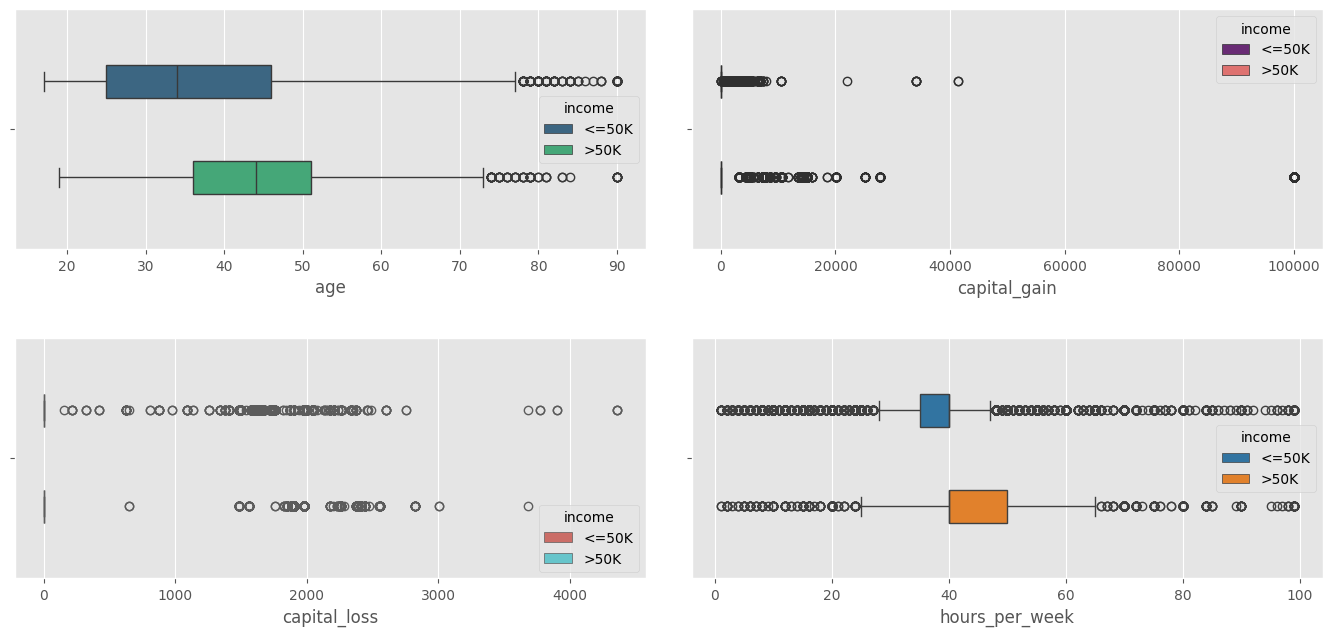

In [11]:
#Numerical box plots
numerical_insights('box')

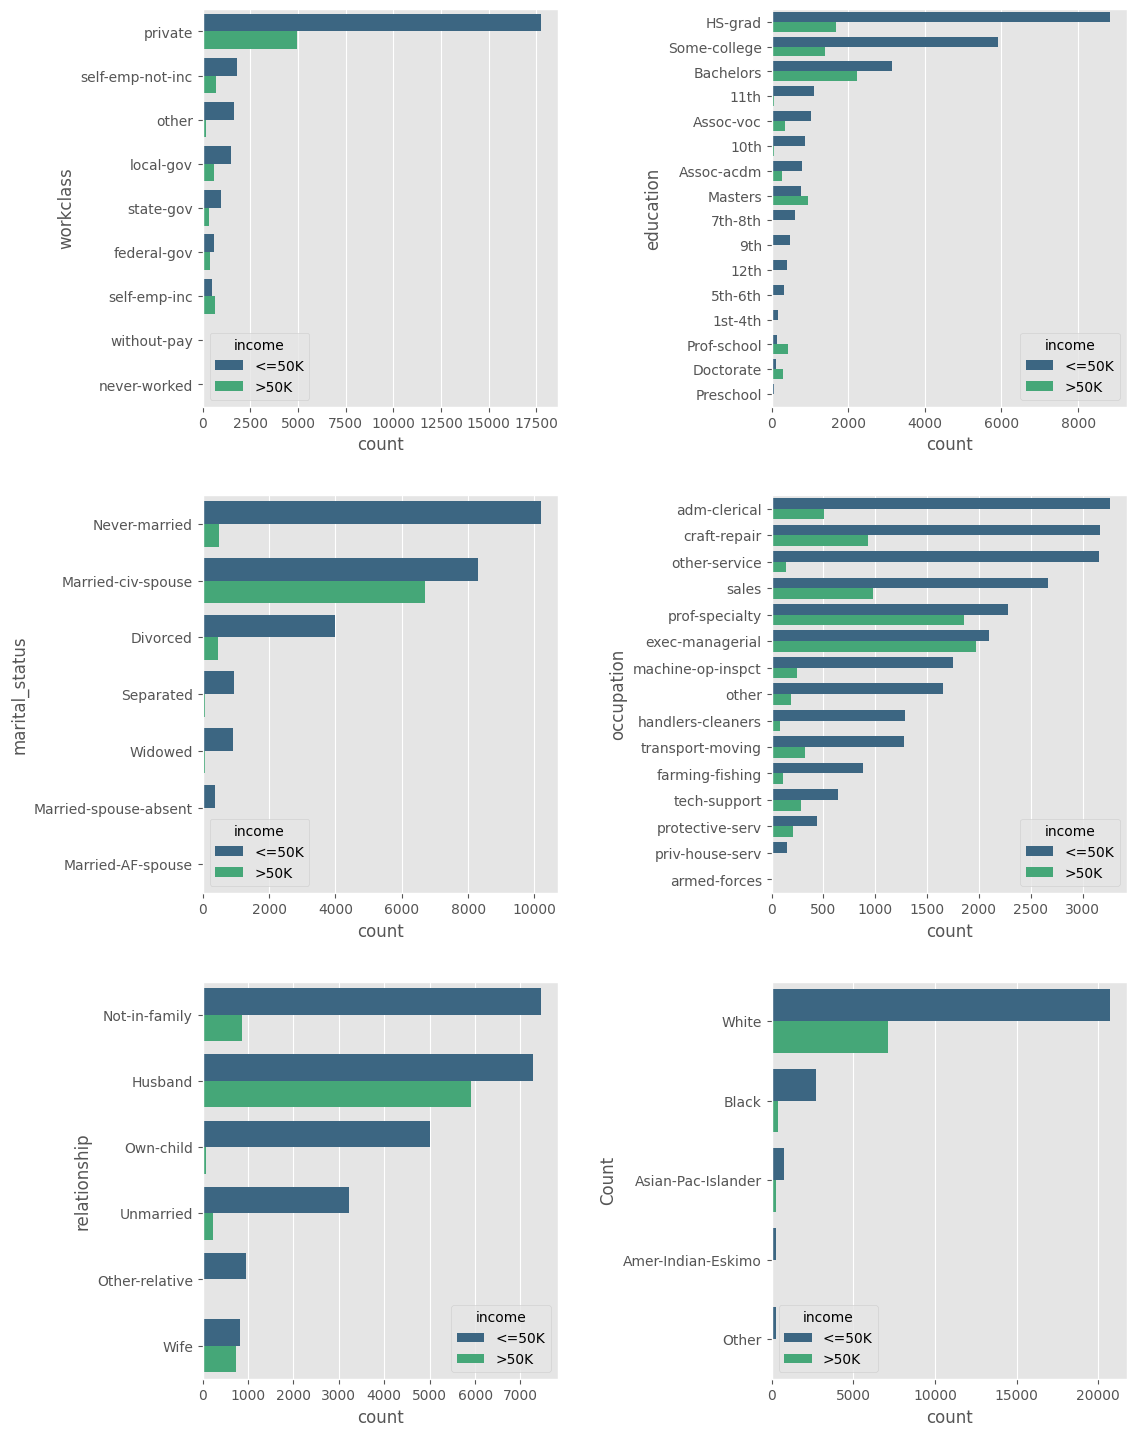

In [145]:
from collections import Counter

fig, ax = plt.subplots(3,2, figsize=(12, 15))
below_50 = model_points[model_points.income=='<=50K']
select_columns = data.select_dtypes(include='object').columns
idx=0
for i in range(3):
    for j in range(2):
        col_name=select_columns[idx]
        if col_name in ['income', 'native_country', 'sex']: continue
        counter_most = Counter(below_50[col_name]).most_common()
        order_by = [w for w,_ in counter_most]

        sns.categorical.countplot(data=model_points,hue='income',palette='viridis',y=f'{col_name}',order=order_by, ax=ax[i,j])
        plt.ylabel('Count',fontsize='12', fontweight='light')
        idx+=1
        # plt.legend(title=f'Income',bbox_to_anchor=(1.2,1),)#,fontsize='8', fancybox=True, shadow=True)
plt.tight_layout(pad=3)
plt.show()

****
### **Build Models**

In [74]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import naive_bayes as nb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes, neighbors
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, MultiLabelBinarizer

<Axes: >

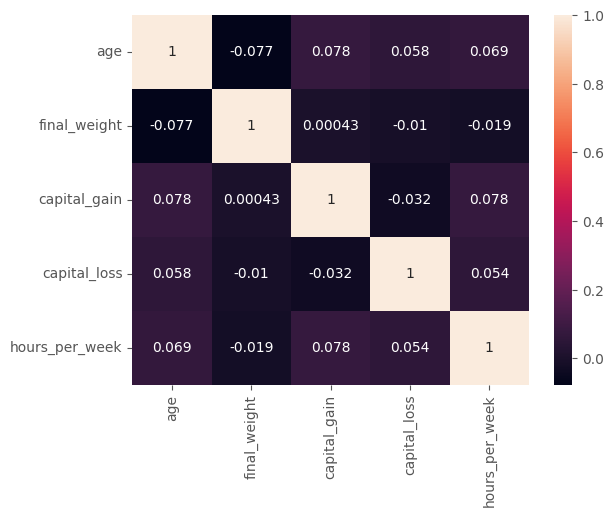

In [65]:
#Numerical Feature Importance
sns.heatmap(model_points.select_dtypes(exclude='object').corr(), annot=True)

In [75]:
#Scaling and Encoding
model_data = copy.deepcopy(model_points)
encoder = LabelEncoder()
st_scaler = StandardScaler()
one_hot = OneHotEncoder()

for col in model_data.select_dtypes(exclude='object').columns:
    model_data[col] = st_scaler.fit_transform(model_data[col].values.reshape(-1,1))
    
for col in model_data.select_dtypes(include='object').columns:
    if col=='income': continue
    values = model_data.loc[:, [col]].values
    model_data[col] =  one_hot.fit_transform(values).toarray()
    

features = model_data.drop(columns=['income']).values
target =encoder.fit_transform(model_data.loc[ :, ['income']])

#Training and Testing split
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.2, random_state=42)
# encoder.inverse_transform(target)

In [83]:
#Model Creation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB


#Build pipeline
steps = [
    ('svc', SVC(C=10, kernel='sigmoid',max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=43)),
    ('knn', KNeighborsClassifier(n_neighbors=3,weights='uniform', algorithm='ball_tree')),
    ('tree', DecisionTreeClassifier(random_state=43)),
    ('nb', GaussianNB(var_smoothing=1e-6)),
    ('xgb', XGBClassifier(n_estimators=1000, random_state=43)),
    ('lg', LogisticRegression(random_state=43, penalty='l2')),
]

pipes = Pipeline(steps)

In [86]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

metric_scores=[]
for key, pipe in tqdm(pipes.steps):
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    scores = [key, acc, prec, recall, f1, roc_auc]
    metric_scores.append(scores)

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [01:14<00:00, 10.66s/it]


In [125]:
ms = pd.DataFrame(metric_scores, columns=['model', 'accuracy', 'precision', 'recall', 'f1','roc_auc'])
ms_long=pd.melt(ms, id_vars='model', var_name='metric', value_name='score')

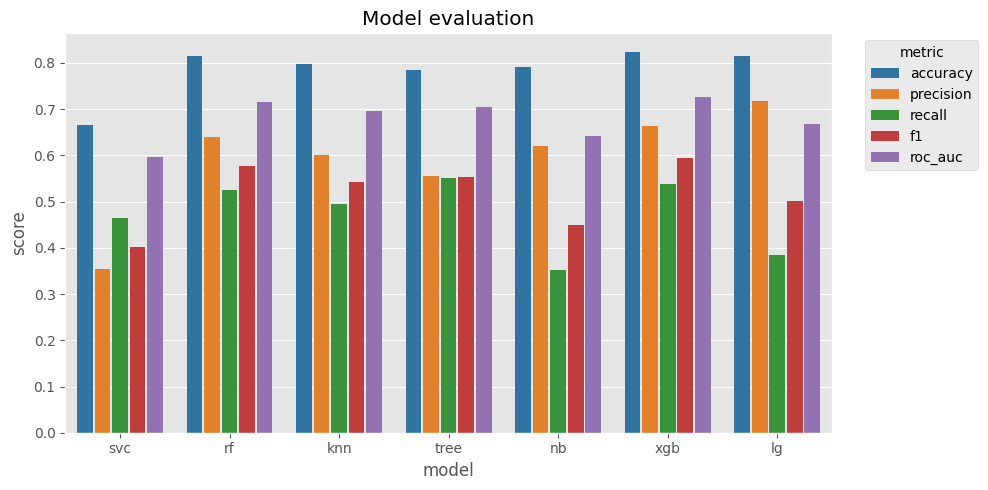

In [144]:
fig, ax =plt.subplots(1,1,figsize=(10,5))
plt.style.use('ggplot')
sns.barplot(ms_long, x='model', y='score', hue='metric', palette='tab10',gap=0.1)
plt.legend(title=f'metric',bbox_to_anchor=(1.2,1))
plt.title('Model evaluation')
plt.tight_layout()
plt.show()

- Except support vector, all other models have good accuracy.
- XGBoost Classifier(xgb) is better overall performance.
- So we choose xgb for hyper-parameter tunining and optimization.

In [140]:
# Tuning Hyperparameters and model optimization

